In [39]:
import pandas as pd
from catboost import CatBoostRegressor, Pool, cv

In [229]:
# Load your data
data = pd.read_csv("catboost_training_data.csv")

/var/folders/dz/j5wssbrn5m11y98nkbpt60kr0000gn/T/ipykernel_89491/476858585.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("catboost_training_data.csv")


In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2766194 entries, 0 to 2766193
Data columns (total 20 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date           object 
 1   country        object 
 2   brand          object 
 3   dayweek        float64
 4   ther_area      object 
 5   main_channel   object 
 6   month          float64
 7   monthly        float64
 8   n_wd_bef       int64  
 9   n_wd_aft       int64  
 10  wd             int64  
 11  wd_left        int64  
 12  wd_perc        float64
 13  hospital_rate  float64
 14  n_weekday_0    int64  
 15  n_weekday_1    int64  
 16  n_weekday_2    int64  
 17  n_weekday_3    int64  
 18  n_weekday_4    int64  
 19  phase          float64
dtypes: float64(6), int64(9), object(5)
memory usage: 422.1+ MB


In [231]:
data.isnull().sum()

date                  0
country               0
brand                 0
dayweek               0
ther_area        350279
main_channel          0
month                 0
monthly               0
n_wd_bef              0
n_wd_aft              0
wd                    0
wd_left               0
wd_perc               0
hospital_rate    496233
n_weekday_0           0
n_weekday_1           0
n_weekday_2           0
n_weekday_3           0
n_weekday_4           0
phase                 0
dtype: int64

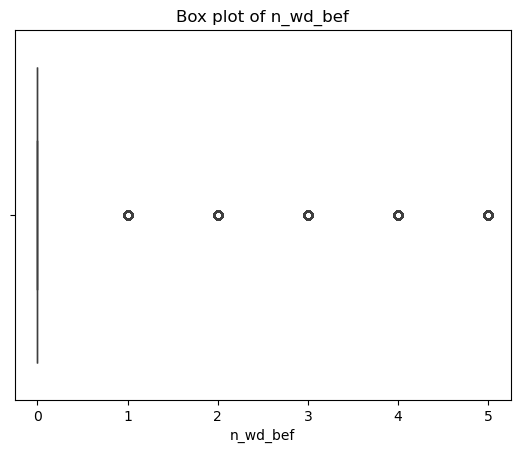

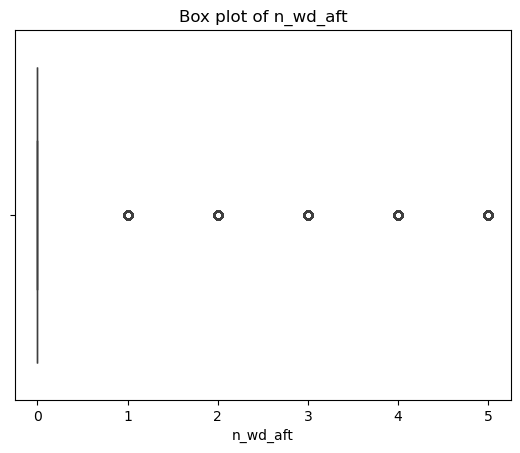

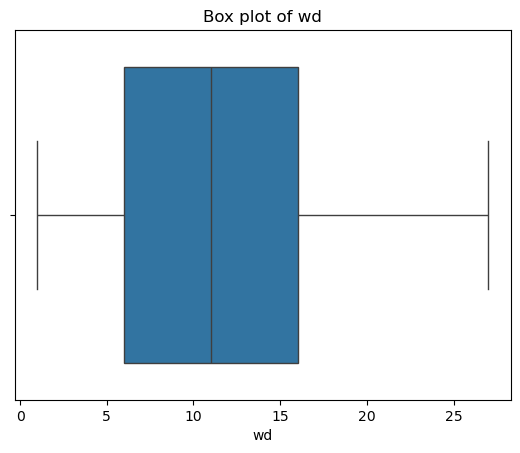

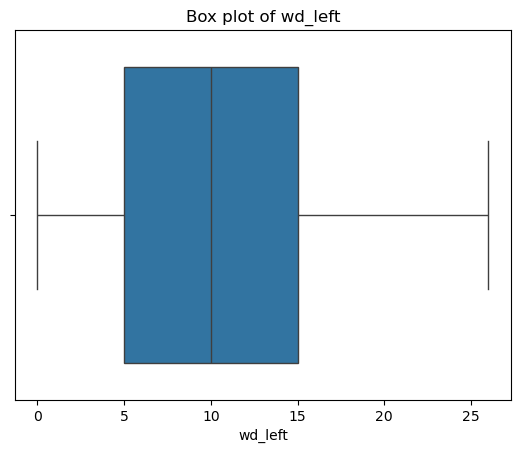

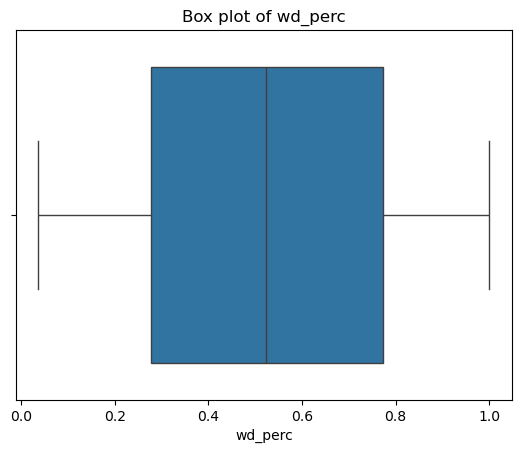

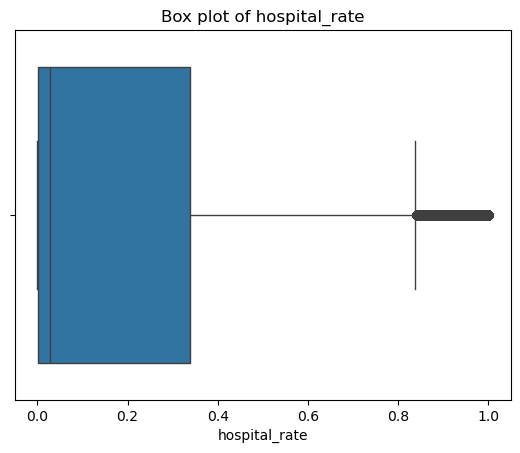

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features
numerical_features = ['n_wd_bef', 'n_wd_aft', 'wd', 'wd_left', 'wd_perc', 'hospital_rate']

# Plotting box plots for each numerical feature
for feature in numerical_features:
    sns.boxplot(x=data[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

In [232]:
# Optional: Sort by date if the data isn't already sorted
data.sort_values('date', inplace=True)
data

,date,country,brand,dayweek,ther_area,main_channel,month,monthly,n_wd_bef,n_wd_aft,wd,wd_left,wd_perc,hospital_rate,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,phase
1125189,2013-01-01,Etheria,VCWIO,1.0,C,RETAIL,1.0,0.013765,0,0,1,21,0.045455,0.00000,4,5,5,0,0,0.0
1130375,2013-01-01,Etheria,ZVLFE,1.0,M,RETAIL,1.0,0.014924,0,0,1,21,0.045455,0.00000,4,5,5,0,0,0.0
1111288,2013-01-01,Etheria,HIBSM,1.0,N,RETAIL,1.0,0.010161,0,0,1,21,0.045455,0.00000,4,5,5,0,0,0.0
1115508,2013-01-01,Etheria,KMXBC,1.0,N,RETAIL,1.0,0.024530,0,0,1,21,0.045455,0.00000,4,5,5,0,0,0.0
1116105,2013-01-01,Etheria,LGFTN,1.0,N,RETAIL,1.0,0.062210,0,0,1,21,0.045455,0.00000,4,5,5,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135776,2021-12-31,Fangorn,EUJWP,4.0,A,HOSPITAL,12.0,0.057745,0,0,23,0,1.000000,1.00000,4,4,5,5,5,0.0
171569,2021-12-31,Arendelle,PPXOK,4.0,C,RETAIL,12.0,0.008769,0,0,23,0,1.000000,0.00000,8,8,10,10,10,0.0
160405,2021-12-31,Arendelle,MLKJM,4.0,S,RETAIL,12.0,0.030177,0,0,23,0,1.000000,0.00000,8,8,10,10,10,0.0
125895,2021-12-31,Aldovia,YUHDX,4.0,N,RETAIL,12.0,0.060633,0,0,21,0,1.000000,0.01422,3,4,4,5,5,0.0


In [233]:
data['ther_area'] = data['ther_area'].fillna('U')
data['month'] = data['month'].astype(int)
data['dayweek'] = data['dayweek'].astype(int)
# Identify categorical columns
categorical_features = ['brand', 'country', 'dayweek', 'month', 'ther_area', 'main_channel']
# Ensure categorical columns are of type 'category'
for cat_feature in categorical_features:
    data[cat_feature] = data[cat_feature].astype('category')

In [234]:
data.isnull().sum()

date                  0
country               0
brand                 0
dayweek               0
ther_area             0
main_channel          0
month                 0
monthly               0
n_wd_bef              0
n_wd_aft              0
wd                    0
wd_left               0
wd_perc               0
hospital_rate    496233
n_weekday_0           0
n_weekday_1           0
n_weekday_2           0
n_weekday_3           0
n_weekday_4           0
phase                 0
dtype: int64

In [235]:
# Example: Use the last 20% of data as the test set
split_index = int(len(data) * 0.8)
train_data = data[:split_index]
test_data = data[split_index:]

In [236]:
# Prepare the training and test sets
X_train = train_data.drop(['date', 'monthly', 'phase'], axis=1)
y_train = train_data['phase']
X_test = test_data.drop(['date', 'monthly', 'phase'], axis=1)
y_test = test_data['phase']

# Create Pool objects
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_test, cat_features=categorical_features)

In [237]:
X_train

,country,brand,dayweek,ther_area,main_channel,month,n_wd_bef,n_wd_aft,wd,wd_left,wd_perc,hospital_rate,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4
1125189,Etheria,VCWIO,1,C,RETAIL,1,0,0,1,21,0.045455,0.000000,4,5,5,0,0
1130375,Etheria,ZVLFE,1,M,RETAIL,1,0,0,1,21,0.045455,0.000000,4,5,5,0,0
1111288,Etheria,HIBSM,1,N,RETAIL,1,0,0,1,21,0.045455,0.000000,4,5,5,0,0
1115508,Etheria,KMXBC,1,N,RETAIL,1,0,0,1,21,0.045455,0.000000,4,5,5,0,0
1116105,Etheria,LGFTN,1,N,RETAIL,1,0,0,1,21,0.045455,0.000000,4,5,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286721,Arrakis,VXLPO,1,N,RETAIL,2,0,0,17,3,0.850000,0.064897,8,8,8,8,8
1434655,Hogwarts,GUCEF,1,A,RETAIL,2,0,0,17,3,0.850000,0.007854,4,4,4,4,4
287732,Arrakis,WFGXK,1,L,RETAIL,2,0,0,17,3,0.850000,0.257722,8,8,8,8,8
1174333,Fangorn,VXLPO,1,N,HOSPITAL,2,0,0,18,3,0.857143,1.000000,4,4,4,4,4


In [238]:
model = CatBoostRegressor(iterations=800, depth=8, learning_rate=0.2, loss_function='RMSE')
model.fit(train_pool)

0:	learn: 0.0560624	total: 753ms	remaining: 10m 1s
1:	learn: 0.0556194	total: 1.45s	remaining: 9m 37s
2:	learn: 0.0553192	total: 1.89s	remaining: 8m 21s
3:	learn: 0.0551142	total: 2.31s	remaining: 7m 38s
4:	learn: 0.0548528	total: 2.83s	remaining: 7m 29s
5:	learn: 0.0546062	total: 3.29s	remaining: 7m 14s
6:	learn: 0.0544864	total: 3.7s	remaining: 6m 58s
7:	learn: 0.0542878	total: 4.26s	remaining: 7m 1s
8:	learn: 0.0542016	total: 4.7s	remaining: 6m 53s
9:	learn: 0.0539943	total: 5.33s	remaining: 7m 1s
10:	learn: 0.0539443	total: 5.8s	remaining: 6m 56s
11:	learn: 0.0538189	total: 6.26s	remaining: 6m 50s
12:	learn: 0.0537598	total: 6.9s	remaining: 6m 57s
13:	learn: 0.0536454	total: 7.53s	remaining: 7m 2s
14:	learn: 0.0535736	total: 7.93s	remaining: 6m 55s
15:	learn: 0.0534897	total: 8.41s	remaining: 6m 51s
16:	learn: 0.0534029	total: 8.84s	remaining: 6m 47s
17:	learn: 0.0533383	total: 9.33s	remaining: 6m 45s
18:	learn: 0.0532381	total: 9.94s	remaining: 6m 48s
19:	learn: 0.0531876	total: 1

In [239]:
from sklearn.metrics import mean_squared_error

# Predict
predictions = model.predict(test_pool)

# Evaluate
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.003033635293453608


In [240]:
df_submission = pd.read_csv("catboost_submission_data.csv")

In [241]:
df_submission.isnull().sum()

date                 0
country              0
brand                0
dayweek              0
ther_area        19858
main_channel     19858
month                0
n_wd_bef             0
n_wd_aft             0
wd                   0
wd_left              0
wd_perc              0
hospital_rate    19858
n_weekday_0          0
n_weekday_1          0
n_weekday_2          0
n_weekday_3          0
n_weekday_4          0
dtype: int64

In [242]:
X_train.columns

Index(['country', 'brand', 'dayweek', 'ther_area', 'main_channel', 'month',
       'n_wd_bef', 'n_wd_aft', 'wd', 'wd_left', 'wd_perc', 'hospital_rate',
       'n_weekday_0', 'n_weekday_1', 'n_weekday_2', 'n_weekday_3',
       'n_weekday_4'],
      dtype='object')

In [243]:
# Create a mapping DataFrame from df
mapping_df = data.dropna(subset=['main_channel']).drop_duplicates(subset=['country', 'brand'])[['country', 'brand', 'main_channel']]

# Merge with df_submission
df_submission = pd.merge(df_submission, mapping_df, on=['country', 'brand'], how='left', suffixes=('', '_from_df'))

# Fill NaN values in df_submission['Main_channel'] from the merged column
df_submission['main_channel'] = df_submission['main_channel'].fillna(df_submission['main_channel_from_df'])

# Drop the extra column used for merging
df_submission.drop(columns=['main_channel_from_df'], inplace=True)
df_submission

,date,country,brand,dayweek,ther_area,main_channel,month,n_wd_bef,n_wd_aft,wd,wd_left,wd_perc,hospital_rate,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4
0,2022-01-03,Aldovia,AIMST,0.0,NaN,COMBINED,1.0,0,0,1,20,0.047619,NaN,5,4,4,4,4
1,2022-01-04,Aldovia,AIMST,1.0,NaN,COMBINED,1.0,0,0,2,19,0.095238,NaN,5,4,4,4,4
2,2022-01-05,Aldovia,AIMST,2.0,NaN,COMBINED,1.0,0,0,3,18,0.142857,NaN,5,4,4,4,4
3,2022-01-06,Aldovia,AIMST,3.0,NaN,COMBINED,1.0,0,0,4,17,0.190476,NaN,5,4,4,4,4
4,2022-01-07,Aldovia,AIMST,4.0,NaN,COMBINED,1.0,0,2,5,16,0.238095,NaN,5,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180840,2022-12-19,Zamunda,ZKKLD,0.0,R,RETAIL,12.0,2,0,11,4,0.733333,0.00088,3,3,3,2,4
180841,2022-12-20,Zamunda,ZKKLD,1.0,R,RETAIL,12.0,0,0,12,3,0.800000,0.00088,3,3,3,2,4
180842,2022-12-21,Zamunda,ZKKLD,2.0,R,RETAIL,12.0,0,0,13,2,0.866667,0.00088,3,3,3,2,4
180843,2022-12-22,Zamunda,ZKKLD,3.0,R,RETAIL,12.0,0,0,14,1,0.933333,0.00088,3,3,3,2,4


In [244]:
df_submission.isnull().sum()

date                 0
country              0
brand                0
dayweek              0
ther_area        19858
main_channel         0
month                0
n_wd_bef             0
n_wd_aft             0
wd                   0
wd_left              0
wd_perc              0
hospital_rate    19858
n_weekday_0          0
n_weekday_1          0
n_weekday_2          0
n_weekday_3          0
n_weekday_4          0
dtype: int64

In [245]:
df_submission['date'] = pd.to_datetime(df_submission['date'])
# Optional: Sort by date if the data isn't already sorted
df_submission.sort_values('date', inplace=True)
df_submission

,date,country,brand,dayweek,ther_area,main_channel,month,n_wd_bef,n_wd_aft,wd,wd_left,wd_perc,hospital_rate,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4
0,2022-01-03,Aldovia,AIMST,0.0,NaN,COMBINED,1.0,0,0,1,20,0.047619,NaN,5,4,4,4,4
162479,2022-01-03,Wakanda,WFGXK,0.0,L,RETAIL,1.0,0,0,1,20,0.047619,0.000000,5,4,4,4,4
100950,2022-01-03,Latveria,TFRIZ,0.0,S,RETAIL,1.0,0,0,1,19,0.050000,0.000000,5,4,4,3,4
63836,2022-01-03,Essos,EAHGQ,0.0,L,RETAIL,1.0,0,0,1,20,0.047619,0.004567,5,4,4,4,4
128695,2022-01-03,Qarth,JTOEV,0.0,L,RETAIL,1.0,0,0,1,20,0.047619,0.183026,10,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106043,2022-12-30,Narnia,FNHPF,4.0,NaN,COMBINED,12.0,0,0,20,0,1.000000,NaN,3,3,4,5,5
69028,2022-12-30,Fangorn,HGSMA,4.0,L,HOSPITAL,12.0,0,0,22,0,1.000000,1.000000,4,4,4,5,5
105793,2022-12-30,Narnia,FLGPE,4.0,L,HOSPITAL,12.0,0,0,20,0,1.000000,0.975639,3,3,4,5,5
89964,2022-12-30,Hogwarts,LIIDH,4.0,R,RETAIL,12.0,0,0,22,0,1.000000,0.015211,4,4,4,5,5


In [246]:
# Add 'U' to the categories of 'ther_area'
#if 'U' not in df_submission['ther_area'].cat.categories:
#    df_submission['ther_area'] = df_submission['ther_area'].cat.add_categories('U')

In [247]:
df_submission['ther_area'] = df_submission['ther_area'].fillna('U')
df_submission['month'] = df_submission['month'].astype(int)
df_submission['dayweek'] = df_submission['dayweek'].astype(int)
# Identify categorical columns
categorical_features = ['brand', 'country', 'dayweek', 'month', 'ther_area', 'main_channel']
# Ensure categorical columns are of type 'category'
for cat_feature in categorical_features:
    df_submission[cat_feature] = df_submission[cat_feature].astype('category')

In [248]:
df_submission.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180845 entries, 0 to 107793
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           180845 non-null  datetime64[ns]
 1   country        180845 non-null  category      
 2   brand          180845 non-null  category      
 3   dayweek        180845 non-null  category      
 4   ther_area      180845 non-null  category      
 5   main_channel   180845 non-null  category      
 6   month          180845 non-null  category      
 7   n_wd_bef       180845 non-null  int64         
 8   n_wd_aft       180845 non-null  int64         
 9   wd             180845 non-null  int64         
 10  wd_left        180845 non-null  int64         
 11  wd_perc        180845 non-null  float64       
 12  hospital_rate  160987 non-null  float64       
 13  n_weekday_0    180845 non-null  int64         
 14  n_weekday_1    180845 non-null  int64         
 15  n_wee

In [249]:
# Identify categorical columns
categorical_features = ['brand', 'country', 'dayweek', 'month', 'ther_area', 'main_channel']

# Ensure categorical columns are of type 'category'
for cat_feature in categorical_features:
    df_submission[cat_feature] = df_submission[cat_feature].astype('category')
submission_X_test = df_submission.drop(['date'], axis=1)

In [250]:
X_pred = test_data.drop(['date', 'monthly', 'phase'], axis=1)
X_pred

,country,brand,dayweek,ther_area,main_channel,month,n_wd_bef,n_wd_aft,wd,wd_left,wd_perc,hospital_rate,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4
283303,Arrakis,VDVBR,1,L,RETAIL,2,0,0,17,3,0.85,0.162840,8,8,8,8,8
99054,Aldovia,RXRWV,1,L,HOSPITAL,2,0,0,17,3,0.85,1.000000,4,4,4,4,4
1427193,Hogwarts,FIPNP,1,S,RETAIL,2,0,0,17,3,0.85,0.000091,4,4,4,4,4
1251308,Gallifrey,DKCQN,1,U,COMBINED,2,0,0,17,3,0.85,NaN,8,8,8,8,8
102196,Aldovia,SOXJL,1,S,RETAIL,2,0,0,17,3,0.85,0.006086,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135776,Fangorn,EUJWP,4,A,HOSPITAL,12,0,0,23,0,1.00,1.000000,4,4,5,5,5
171569,Arendelle,PPXOK,4,C,RETAIL,12,0,0,23,0,1.00,0.000000,8,8,10,10,10
160405,Arendelle,MLKJM,4,S,RETAIL,12,0,0,23,0,1.00,0.000000,8,8,10,10,10
125895,Aldovia,YUHDX,4,N,RETAIL,12,0,0,21,0,1.00,0.014220,3,4,4,5,5


In [251]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212955 entries, 1125189 to 15041
Data columns (total 17 columns):
 #   Column         Dtype   
---  ------         -----   
 0   country        category
 1   brand          category
 2   dayweek        category
 3   ther_area      category
 4   main_channel   category
 5   month          category
 6   n_wd_bef       int64   
 7   n_wd_aft       int64   
 8   wd             int64   
 9   wd_left        int64   
 10  wd_perc        float64 
 11  hospital_rate  float64 
 12  n_weekday_0    int64   
 13  n_weekday_1    int64   
 14  n_weekday_2    int64   
 15  n_weekday_3    int64   
 16  n_weekday_4    int64   
dtypes: category(6), float64(2), int64(9)
memory usage: 217.4 MB


In [252]:
submission_X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180845 entries, 0 to 107793
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   country        180845 non-null  category
 1   brand          180845 non-null  category
 2   dayweek        180845 non-null  category
 3   ther_area      180845 non-null  category
 4   main_channel   180845 non-null  category
 5   month          180845 non-null  category
 6   n_wd_bef       180845 non-null  int64   
 7   n_wd_aft       180845 non-null  int64   
 8   wd             180845 non-null  int64   
 9   wd_left        180845 non-null  int64   
 10  wd_perc        180845 non-null  float64 
 11  hospital_rate  160987 non-null  float64 
 12  n_weekday_0    180845 non-null  int64   
 13  n_weekday_1    180845 non-null  int64   
 14  n_weekday_2    180845 non-null  int64   
 15  n_weekday_3    180845 non-null  int64   
 16  n_weekday_4    180845 non-null  int64   
dtypes: category(6),

In [253]:
model

In [254]:
submission_predictions = model.predict(submission_X_test)

In [255]:
import numpy as np
submission_predictions = np.maximum(submission_predictions, 0)  # Setting negative predictions to zero
df_submission['phase'] = submission_predictions
df_submission

,date,country,brand,dayweek,ther_area,main_channel,month,n_wd_bef,n_wd_aft,wd,wd_left,wd_perc,hospital_rate,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,phase
0,2022-01-03,Aldovia,AIMST,0,U,COMBINED,1,0,0,1,20,0.047619,NaN,5,4,4,4,4,0.036235
162479,2022-01-03,Wakanda,WFGXK,0,L,RETAIL,1,0,0,1,20,0.047619,0.000000,5,4,4,4,4,0.000000
100950,2022-01-03,Latveria,TFRIZ,0,S,RETAIL,1,0,0,1,19,0.050000,0.000000,5,4,4,3,4,0.009717
63836,2022-01-03,Essos,EAHGQ,0,L,RETAIL,1,0,0,1,20,0.047619,0.004567,5,4,4,4,4,0.057493
128695,2022-01-03,Qarth,JTOEV,0,L,RETAIL,1,0,0,1,20,0.047619,0.183026,10,8,8,8,8,0.003120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106043,2022-12-30,Narnia,FNHPF,4,U,COMBINED,12,0,0,20,0,1.000000,NaN,3,3,4,5,5,0.042915
69028,2022-12-30,Fangorn,HGSMA,4,L,HOSPITAL,12,0,0,22,0,1.000000,1.000000,4,4,4,5,5,0.000000
105793,2022-12-30,Narnia,FLGPE,4,L,HOSPITAL,12,0,0,20,0,1.000000,0.975639,3,3,4,5,5,0.035409
89964,2022-12-30,Hogwarts,LIIDH,4,R,RETAIL,12,0,0,22,0,1.000000,0.015211,4,4,4,5,5,0.005063


In [256]:

df_submission['month'] = df_submission['date'].dt.to_period('M')
grouped = df_submission.groupby(['month', 'brand', 'country'])

normalized_predictions = []

for name, group in grouped:
    group = group.copy()  # To avoid SettingWithCopyWarning
    month_sum = group['phase'].sum()
    group['prediction'] = group['phase'] / month_sum

    # Set negative predictions to zero
    group['prediction'] = np.maximum(group['prediction'], 0)

    # Re-normalize to ensure the sum is 1
    re_normalized_sum = group['prediction'].sum()
    group['prediction'] = group['prediction'] / re_normalized_sum

    normalized_predictions.append(group)

# Concatenate results
final_predictions = pd.concat(normalized_predictions)
final_predictions

,date,country,brand,dayweek,ther_area,main_channel,month,n_wd_bef,n_wd_aft,wd,wd_left,wd_perc,hospital_rate,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,phase,prediction
0,2022-01-03,Aldovia,AIMST,0,U,COMBINED,2022-01,0,0,1,20,0.047619,NaN,5,4,4,4,4,0.036235,0.034537
1,2022-01-04,Aldovia,AIMST,1,U,COMBINED,2022-01,0,0,2,19,0.095238,NaN,5,4,4,4,4,0.096517,0.091994
2,2022-01-05,Aldovia,AIMST,2,U,COMBINED,2022-01,0,0,3,18,0.142857,NaN,5,4,4,4,4,0.071813,0.068448
3,2022-01-06,Aldovia,AIMST,3,U,COMBINED,2022-01,0,0,4,17,0.190476,NaN,5,4,4,4,4,0.060216,0.057395
4,2022-01-07,Aldovia,AIMST,4,U,COMBINED,2022-01,0,2,5,16,0.238095,NaN,5,4,4,4,4,0.048020,0.045770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81398,2022-12-19,Gallifrey,ZVLFE,0,U,COMBINED,2022-12,2,0,13,4,0.764706,NaN,6,6,6,8,8,0.053833,0.063690
81399,2022-12-20,Gallifrey,ZVLFE,1,U,COMBINED,2022-12,0,0,14,3,0.823529,NaN,6,6,6,8,8,0.052436,0.062037
81400,2022-12-21,Gallifrey,ZVLFE,2,U,COMBINED,2022-12,0,0,15,2,0.882353,NaN,6,6,6,8,8,0.062912,0.074431
81401,2022-12-22,Gallifrey,ZVLFE,3,U,COMBINED,2022-12,0,0,16,1,0.941176,NaN,6,6,6,8,8,0.063661,0.075317


In [257]:
final_predictions['hospital_rate'].isnull().sum()

19858

<Axes: xlabel='date'>

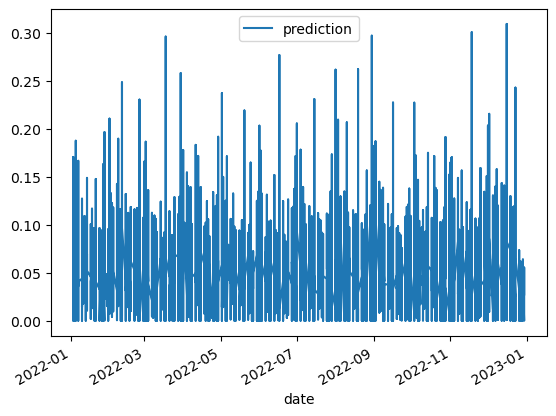

In [258]:
final_predictions.plot(x='date', y='prediction')

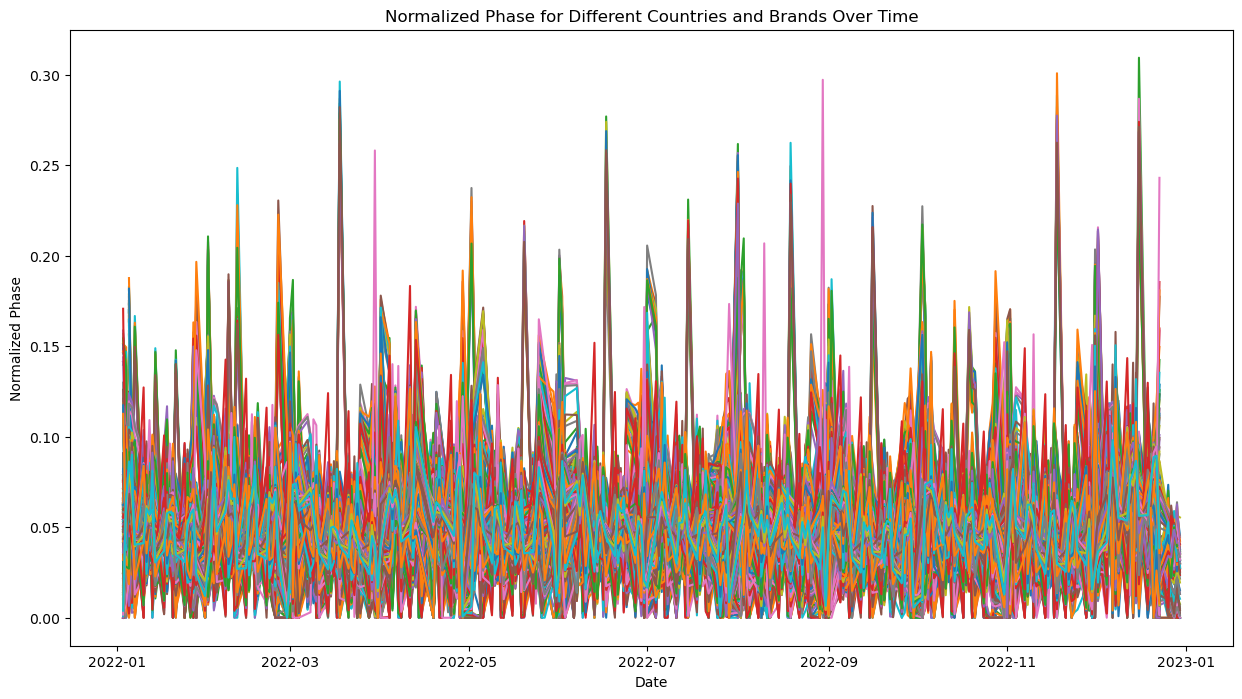

In [259]:
import matplotlib.pyplot as plt
grouped_data = final_predictions.groupby(['country', 'brand'])
plt.figure(figsize=(15, 8))  # Adjust the figure size as necessary

# Iterate through each group
for (country, brand), group in grouped_data:
    plt.plot(group['date'], group['prediction'], label=f'{country}-{brand}')

plt.xlabel('Date')
plt.ylabel('Normalized Phase')
plt.title('Normalized Phase for Different Countries and Brands Over Time')
#plt.legend()  # Display the legend
plt.show()


In [260]:
df_submission_check = final_predictions[['country', 'brand', 'date', 'prediction']]
df_submission_check

,country,brand,date,prediction
0,Aldovia,AIMST,2022-01-03,0.034537
1,Aldovia,AIMST,2022-01-04,0.091994
2,Aldovia,AIMST,2022-01-05,0.068448
3,Aldovia,AIMST,2022-01-06,0.057395
4,Aldovia,AIMST,2022-01-07,0.045770
...,...,...,...,...
81398,Gallifrey,ZVLFE,2022-12-19,0.063690
81399,Gallifrey,ZVLFE,2022-12-20,0.062037
81400,Gallifrey,ZVLFE,2022-12-21,0.074431
81401,Gallifrey,ZVLFE,2022-12-22,0.075317


In [261]:
df_submission_check.to_csv('submission_team37_try2.csv')

Cross-Validation

In [263]:
# Assuming df is your DataFrame and it's already preprocessed
X = data.drop(['date', 'monthly', 'phase'], axis=1)
y = data['phase']

# Create a Pool object
pool = Pool(X, y, cat_features=categorical_features)

# Define CatBoost parameters
params = {
    'iterations': 800,
    'learning_rate': 0.02,
    'depth': 8,
    'loss_function': 'RMSE',
    'verbose': False
}

# Perform cross-validation
cv_results = cv(
    params=params,
    pool=pool,
    fold_count=5,
    partition_random_seed=0,
    plot=True
)

# cv_results is a DataFrame that contains cross-validation results
print(cv_results.head())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.05175095778
bestIteration = 799

Training on fold [1/5]


KeyboardInterrupt: 

In [264]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=3)
param_grid = {
    'iterations': [800, 1200],
    'learning_rate': [0.01, 0.03, 0.1],
    'depth': [8, 10]
    # Add other hyperparameters here
}

# Create a CatBoostRegressor object
model = CatBoostRegressor(loss_function='RMSE', verbose=True)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=1)

In [265]:
grid_search.fit(X, y, cat_features=categorical_features)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
0:	learn: 0.0557663	total: 200ms	remaining: 2m 40s
1:	learn: 0.0557206	total: 427ms	remaining: 2m 50s
2:	learn: 0.0556855	total: 614ms	remaining: 2m 43s
3:	learn: 0.0556415	total: 802ms	remaining: 2m 39s
4:	learn: 0.0556129	total: 925ms	remaining: 2m 27s
5:	learn: 0.0555852	total: 1.03s	remaining: 2m 16s
6:	learn: 0.0555541	total: 1.14s	remaining: 2m 9s
7:	learn: 0.0555236	total: 1.27s	remaining: 2m 5s
8:	learn: 0.0554944	total: 1.41s	remaining: 2m 3s
9:	learn: 0.0554633	total: 1.53s	remaining: 2m 1s
10:	learn: 0.0554333	total: 1.68s	remaining: 2m
11:	learn: 0.0553914	total: 1.87s	remaining: 2m 2s
12:	learn: 0.0553510	total: 2s	remaining: 2m
13:	learn: 0.0553221	total: 2.15s	remaining: 2m
14:	learn: 0.0552830	total: 2.32s	remaining: 2m 1s
15:	learn: 0.0552583	total: 2.45s	remaining: 2m
16:	learn: 0.0552169	total: 2.59s	remaining: 1m 59s
17:	learn: 0.0551894	total: 2.68s	remaining: 1m 56s
18:	learn: 0.0551526	total: 2.83s	rema

In [ ]:
print("Best parameters:", grid_search.best_params_)
best_rmse = np.sqrt(-grid_search.best_score_)
print("Best RMSE: ", best_rmse)

We can revisit it later

In [6]:
data[(data['hospital_rate'].isnull()) & (data['country'] == 'Prydain')]

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
2481110,ORUVA,0.165912,Prydain,2.0,1.0,0.045455,J,NaN,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.038207,NaN
2474784,MOAJK,0.000000,Prydain,2.0,1.0,0.045455,NaN,NaN,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.007137,NaN
2494169,QYGNN,0.000000,Prydain,2.0,1.0,0.045455,N,NaN,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.031543,NaN
2445002,GIKKL,0.000000,Prydain,2.0,1.0,0.045455,N,NaN,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.022342,NaN
2439100,ELXGP,0.000000,Prydain,2.0,1.0,0.045455,NaN,NaN,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.008020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496536,RBBLK,0.000000,Prydain,0.0,11.0,0.952381,NaN,NaN,2.0,0.0,4,5,4,4,4,2021-11-29,20,1,0.015441,NaN
2496537,RBBLK,0.102185,Prydain,1.0,11.0,1.000000,NaN,NaN,0.0,0.0,4,5,4,4,4,2021-11-30,21,0,0.015441,NaN
2427274,AITPJ,0.025644,Prydain,1.0,11.0,1.000000,NaN,NaN,0.0,0.0,4,5,4,4,4,2021-11-30,21,0,0.008757,NaN
2455448,HZCGL,0.066833,Prydain,1.0,11.0,1.000000,NaN,NaN,0.0,0.0,4,5,4,4,4,2021-11-30,21,0,0.008473,NaN


In [7]:
data[(~data['hospital_rate'].isnull()) & (data['country'] == 'Prydain')]

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
2482618,PJZBL,0.000000,Prydain,2.0,1.0,0.045455,R,1.0,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.030115,HOSPITAL
2477362,NXPMK,0.000000,Prydain,2.0,1.0,0.045455,L,1.0,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.120688,HOSPITAL
2475198,MRHKP,0.000000,Prydain,2.0,1.0,0.045455,C,1.0,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.043509,HOSPITAL
2472796,LRHOW,0.000000,Prydain,2.0,1.0,0.045455,A,1.0,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.013811,HOSPITAL
2470073,LGFTN,0.000000,Prydain,2.0,1.0,0.045455,N,1.0,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.019258,HOSPITAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441577,EUJWP,0.203659,Prydain,3.0,12.0,1.000000,A,1.0,0.0,3.0,4,4,5,5,3,2021-12-30,21,0,0.075985,HOSPITAL
2479171,NXPMK,0.194407,Prydain,3.0,12.0,1.000000,L,1.0,0.0,3.0,4,4,5,5,3,2021-12-30,21,0,0.088226,HOSPITAL
2502690,TFRIZ,0.002378,Prydain,3.0,12.0,1.000000,S,1.0,0.0,3.0,4,4,5,5,3,2021-12-30,21,0,0.061760,HOSPITAL
2506404,TXYQX,0.000000,Prydain,3.0,12.0,1.000000,B,1.0,0.0,3.0,4,4,5,5,3,2021-12-30,21,0,0.061217,HOSPITAL


In [10]:
data[(~data['hospital_rate'].isnull()) & (data['country'] == 'Ethieria')]

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel


Here we are assuming that rate of hospital sales are dependent on the country rather than the brand itself since the healthcare structures and distribution policies vary by country. Hence are taking a country wide average and filling it for the missing hospital rates for the given countries.

In [16]:
# Calculate the mean 'hospital_rate' for each country
country_means = data.groupby('country')['hospital_rate'].transform('mean')

# Fill missing values in 'hospital_rate' with their respective country means
data['hospital_rate'] = data['hospital_rate'].fillna(country_means)
data

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
1442742,VCWIO,0.0,Etheria,1.0,1.0,0.045455,C,0.000000,0.0,0.0,4,5,5,0,0,2013-01-01,1,21,0.013765,RETAIL
1414704,HIBSM,0.0,Etheria,1.0,1.0,0.045455,N,0.000000,0.0,0.0,4,5,5,0,0,2013-01-01,1,21,0.010161,RETAIL
1449827,ZKMVW,0.0,Etheria,1.0,1.0,0.045455,N,0.000000,0.0,0.0,4,5,5,0,0,2013-01-01,1,21,0.060426,RETAIL
1452477,ZVLFE,0.0,Etheria,1.0,1.0,0.045455,M,0.000000,0.0,0.0,4,5,5,0,0,2013-01-01,1,21,0.014924,RETAIL
1423379,KMXBC,0.0,Etheria,1.0,1.0,0.045455,N,0.000000,0.0,0.0,4,5,5,0,0,2013-01-01,1,21,0.024530,RETAIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24883,EQZWB,0.0,Aldovia,4.0,12.0,1.000000,NaN,0.339844,0.0,2.0,3,4,4,5,5,2021-12-31,21,0,0.022134,NaN
1864862,HIBSM,0.0,Hogwarts,4.0,12.0,1.000000,N,0.094895,0.0,2.0,4,4,5,5,5,2021-12-31,23,0,0.002765,RETAIL
178322,FUYDW,0.0,Arendelle,4.0,12.0,1.000000,D,0.000000,0.0,0.0,8,8,10,10,10,2021-12-31,23,0,0.002499,RETAIL
1485596,LRHOW,0.0,Fangorn,4.0,12.0,1.000000,A,1.000000,0.0,3.0,4,4,5,5,5,2021-12-31,23,0,0.017103,HOSPITAL


But there are still a few countries with missing hospital rates. Since we have no other options for determining them, we will take the company wide average for those

In [34]:
# Calculate the mean 'hospital_rate' for each country
country_means = data.groupby('brand')['hospital_rate'].transform('mean')

# Fill missing values in 'hospital_rate' with their respective country means
data['hospital_rate'] = data['hospital_rate'].fillna(country_means)
data

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
1442742,VCWIO,0.0,Etheria,1.0,1.0,0.045455,C,0.000000,0.0,0.0,4,5,5,0,0,2013-01-01,1,21,0.013765,RETAIL
1414704,HIBSM,0.0,Etheria,1.0,1.0,0.045455,N,0.000000,0.0,0.0,4,5,5,0,0,2013-01-01,1,21,0.010161,RETAIL
1449827,ZKMVW,0.0,Etheria,1.0,1.0,0.045455,N,0.000000,0.0,0.0,4,5,5,0,0,2013-01-01,1,21,0.060426,RETAIL
1452477,ZVLFE,0.0,Etheria,1.0,1.0,0.045455,M,0.000000,0.0,0.0,4,5,5,0,0,2013-01-01,1,21,0.014924,RETAIL
1423379,KMXBC,0.0,Etheria,1.0,1.0,0.045455,N,0.000000,0.0,0.0,4,5,5,0,0,2013-01-01,1,21,0.024530,RETAIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24883,EQZWB,0.0,Aldovia,4.0,12.0,1.000000,U,0.339844,0.0,2.0,3,4,4,5,5,2021-12-31,21,0,0.022134,NaN
1864862,HIBSM,0.0,Hogwarts,4.0,12.0,1.000000,N,0.094895,0.0,2.0,4,4,5,5,5,2021-12-31,23,0,0.002765,RETAIL
178322,FUYDW,0.0,Arendelle,4.0,12.0,1.000000,D,0.000000,0.0,0.0,8,8,10,10,10,2021-12-31,23,0,0.002499,RETAIL
1485596,LRHOW,0.0,Fangorn,4.0,12.0,1.000000,A,1.000000,0.0,3.0,4,4,5,5,5,2021-12-31,23,0,0.017103,HOSPITAL


But even with that there are still over 10000 cases where the hospital rate cannot be associate with country or brand. For this cases we will make it 0

In [37]:
data['hospital_rate'].fillna(0, inplace=True)
data.isnull().sum()

brand                 0
phase                 0
country               0
dayweek               0
month                 0
wd_perc               0
ther_area        106667
hospital_rate         0
n_nwd_bef             0
n_nwd_aft             0
n_weekday_0           0
n_weekday_1           0
n_weekday_2           0
n_weekday_3           0
n_weekday_4           0
date                  0
wd                    0
wd_left               0
monthly               0
main_channel     504994
dtype: int64

In [22]:
data[data['ther_area'].isnull()]

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
2474784,MOAJK,0.000000,Prydain,2.0,1.0,0.045455,NaN,1.000000,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.007137,NaN
0,AIMST,0.006284,Aldovia,2.0,1.0,0.045455,NaN,0.339844,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.008092,NaN
2702574,CQXPP,0.000000,Sokovia,2.0,1.0,0.047619,NaN,0.000000,1.0,0.0,3,4,5,5,4,2013-01-02,1,20,0.008211,NaN
2698591,AIMST,0.000000,Sokovia,2.0,1.0,0.047619,NaN,0.000000,1.0,0.0,3,4,5,5,4,2013-01-02,1,20,0.006796,NaN
2439100,ELXGP,0.000000,Prydain,2.0,1.0,0.045455,NaN,1.000000,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.008020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861369,HGXNC,0.000000,Hogwarts,4.0,12.0,1.000000,NaN,0.118509,0.0,2.0,4,4,5,5,5,2021-12-31,23,0,0.013630,NaN
43640,HGXNC,0.000000,Aldovia,4.0,12.0,1.000000,NaN,0.339844,0.0,2.0,3,4,4,5,5,2021-12-31,21,0,0.023413,NaN
188970,HZCGL,0.000000,Arendelle,4.0,12.0,1.000000,NaN,0.000000,0.0,0.0,8,8,10,10,10,2021-12-31,23,0,0.009230,NaN
200206,KGUIR,0.000000,Arendelle,4.0,12.0,1.000000,NaN,0.000000,0.0,0.0,8,8,10,10,10,2021-12-31,23,0,0.076724,NaN


In [26]:
# Aggregate data to count non-null 'ther_area' values for each brand
brand_ther_area_count = data.groupby('brand')['ther_area'].count().reset_index()
brand_ther_area_count

,brand,ther_area
0,ABRRE,10197
1,AIMST,0
2,AITPJ,0
3,AIZTT,13225
4,AMOKR,17187
...,...,...
253,ZKMVW,43518
254,ZNDRT,33245
255,ZQSPB,1098
256,ZQXSU,0


In [29]:
# Filter brands with no non-null 'ther_area' values
brands_without_ther_area = brand_ther_area_count[brand_ther_area_count['ther_area'] == 0]['brand']
brands_without_ther_area

1      AIMST
2      AITPJ
6      ARBSZ
9      BFFIN
12     BQSIJ
       ...  
239    YCDFR
241    YMBRG
242    YMOTM
249    ZBEBV
256    ZQXSU
Name: brand, Length: 100, dtype: object

In [33]:
# Ensure 'ther_area' is of categorical type with 'U' as a category
data['ther_area'] = data['ther_area'].astype('category')
if 'U' not in data['ther_area'].cat.categories:
    data['ther_area'] = data['ther_area'].cat.add_categories(['U'])

# Update 'ther_area' to 'U' for the identified brands
data.loc[data['brand'].isin(brands_without_ther_area), 'ther_area'] = 'U'

data.isnull().sum()

brand                 0
phase                 0
country               0
dayweek               0
month                 0
wd_perc               0
ther_area        106667
hospital_rate     67093
n_nwd_bef             0
n_nwd_aft             0
n_weekday_0           0
n_weekday_1           0
n_weekday_2           0
n_weekday_3           0
n_weekday_4           0
date                  0
wd                    0
wd_left               0
monthly               0
main_channel     504994
dtype: int64

Since the above brands did't have any associated ther_area, I introduce new category "unknown"
But what about the brands that has both null and ther_area codes. Let's explore them

In [18]:
null_rows = data[data['hospital_rate'].isnull()]
null_rows

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
1619363,DXHFH,0.000000,Gallifrey,0.0,3.0,0.047619,NaN,NaN,4.0,0.0,10,10,8,8,6,2015-03-02,1,20,0.025549,NaN
1642603,JJVUD,0.010195,Gallifrey,0.0,3.0,0.047619,NaN,NaN,4.0,0.0,10,10,8,8,6,2015-03-02,1,20,0.064120,NaN
1679359,VDVBR,0.000000,Gallifrey,0.0,3.0,0.047619,NaN,NaN,4.0,0.0,10,10,8,8,6,2015-03-02,1,20,0.021126,NaN
1680503,VXLPO,0.000154,Gallifrey,0.0,3.0,0.047619,NaN,NaN,4.0,0.0,10,10,8,8,6,2015-03-02,1,20,0.023169,NaN
1691529,YSZJP,0.000809,Gallifrey,0.0,3.0,0.047619,NaN,NaN,4.0,0.0,10,10,8,8,6,2015-03-02,1,20,0.017223,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620940,DXHFH,0.012355,Gallifrey,3.0,12.0,1.000000,NaN,NaN,0.0,0.0,8,8,10,10,6,2021-12-30,21,0,0.018036,NaN
1648264,JTOEV,0.054766,Gallifrey,3.0,12.0,1.000000,NaN,NaN,0.0,0.0,8,8,10,10,6,2021-12-30,21,0,0.023054,NaN
1648885,KVWWC,0.129000,Gallifrey,3.0,12.0,1.000000,NaN,NaN,0.0,0.0,8,8,10,10,6,2021-12-30,21,0,0.009905,NaN
1696016,ZVLFE,0.011980,Gallifrey,3.0,12.0,1.000000,NaN,NaN,0.0,0.0,8,8,10,10,6,2021-12-30,21,0,0.006133,NaN


In [19]:
null_rows['country'].unique()

array(['Gallifrey'], dtype=object)

In [228]:
# prompt: check if df_submission has any negative values

(df_submission_check['prediction'] < 0).any()
df_submission_check[df_submission_check['prediction'] < 0]


,country,brand,date,prediction
